Goal is to find the extremes of each EEG feature, which probably indicates issues (artifacting).

In [41]:
import numpy as np
import pandas as pd
import logging
import os
import os
import sys

log = lambda msg: logging.info(msg)

root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


In [42]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)

input_dir = "C:\\dev\\play\\brainwave-data"


df_orig = stitch_pipeline_results.stitch_all_days_optimised(input_dir)
df = df_orig.copy()

  0%|          | 0/156 [00:00<?, ?it/s]

c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (590) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (590) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
c:\dev\Brainwave-Processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set low_memory=False.
  post_

# Find outliers

In [43]:
icols = [col for col in df.columns if "_norm" not in col and ('Main_eeg' in col or 'Stage' in col) and not col.endswith("_s") and not col.endswith("aa") and not col.endswith("ab") and not col.endswith("_dt") and not col.endswith("_ds") and not col.endswith("_db") and not col.endswith("_at")]
icols

['Stage',
 'StageInt',
 'Main_eeg_abspow',
 'Main_eeg_alpha',
 'Main_eeg_alphaabs',
 'Main_eeg_auc',
 'Main_eeg_beta',
 'Main_eeg_betaabs',
 'Main_eeg_fdelta',
 'Main_eeg_fdeltaabs',
 'Main_eeg_hcomp',
 'Main_eeg_higuchi',
 'Main_eeg_hmob',
 'Main_eeg_iqr',
 'Main_eeg_kurt',
 'Main_eeg_nzc',
 'Main_eeg_perm',
 'Main_eeg_petrosian',
 'Main_eeg_removed_percentage',
 'Main_eeg_sdelta',
 'Main_eeg_sdeltaabs',
 'Main_eeg_sigma',
 'Main_eeg_sigmaabs',
 'Main_eeg_skew',
 'Main_eeg_specent',
 'Main_eeg_spectral_centroid',
 'Main_eeg_std',
 'Main_eeg_theta',
 'Main_eeg_thetaabs',
 'Main_eeg_svdent']

In [59]:
import scaling
reload(scaling)
idf = df[icols]
stats = scaling.stats(idf)
stats.head()

,Column,P10,P90,Min,Max,Mean,Std,Z-Score-Max,Z-Score-Mean,W_P10,...,Sleep_Z-Score-Max,Sleep_Z-Score-Mean,NonDeepSleep_P10,NonDeepSleep_P90,NonDeepSleep_Min,NonDeepSleep_Max,NonDeepSleep_Mean,NonDeepSleep_Std,NonDeepSleep_Z-Score-Max,NonDeepSleep_Z-Score-Mean
0,Main_eeg_abspow,0.049345,1.340550,0.000000e+00,167344.900000,7.596964,769.279516,217.524709,9.559460e-19,0.171289,...,192.952847,1.268090e-18,0.046296,1.426658,0.000000e+00,167344.900000,8.029017,793.728384,210.823847,-1.140713e-18
1,Main_eeg_alpha,0.008449,0.097425,1.757918e-10,0.476805,0.043223,0.039855,10.879090,-2.796142e-17,0.006621,...,8.166270,-5.230873e-17,0.009918,0.102700,1.757918e-10,0.476805,0.048938,0.041029,10.428502,1.289005e-16
2,Main_eeg_alphaabs,0.003703,0.017751,0.000000e+00,2983.235600,0.172035,14.898946,200.219778,0.000000e+00,0.006892,...,192.360768,0.000000e+00,0.003520,0.018858,0.000000e+00,2983.235600,0.188357,15.611242,191.083281,-1.140713e-18
3,Main_eeg_auc,0.045440,0.238755,0.000000e+00,51.114380,0.135162,0.313125,162.807706,5.065151e-17,0.075184,...,161.373681,-1.014472e-17,0.044084,0.254275,0.000000e+00,51.114380,0.126812,0.326487,156.170516,-5.701732e-18
4,Main_eeg_beta,0.002685,0.058425,6.417467e-11,0.913351,0.026607,0.040546,21.870234,1.166254e-16,0.006764,...,24.934311,-8.876633e-18,0.005137,0.062591,6.417467e-11,0.913351,0.031109,0.042739,20.642415,-1.927804e-16


In [ ]:
threshold = 5

# Create a new column in stats to store counts
stats['Z-Score-Above-Threshold'] = 0

# Assuming 'stats' contains column names and 'df' contains the actual data
for column in stats['Column']:  # Iterate through column names in stats DataFrame
    if column in df.columns:  # Make sure the column exists in df
        col_data = df[column]
        mean = col_data.mean() 
        std = col_data.std()
        z_score = (col_data - mean) / std
        count_above_threshold = (z_score > threshold).sum()
        
        # Update the count in the stats DataFrame
        stats.loc[stats['Column'] == column, 'Z-Score-Above-Threshold'] = count_above_threshold

stats.sort_values(by='Z-Score-Above-Threshold', ascending=False)[['Column', 'Z-Score-Above-Threshold']]


,Column,Z-Score-Above-Threshold
16,Main_eeg_removed_percentage,995
8,Main_eeg_hcomp,935
4,Main_eeg_beta,697
11,Main_eeg_iqr,544
23,Main_eeg_spectral_centroid,406
1,Main_eeg_alpha,368
19,Main_eeg_sigma,316
10,Main_eeg_hmob,307
12,Main_eeg_kurt,261
13,Main_eeg_nzc,232


In [74]:
[col for col in stats.columns if 'Z-Score' in col]

['Z-Score-Max',
 'Z-Score-Mean',
 'W_Z-Score-Max',
 'W_Z-Score-Mean',
 'N1_Z-Score-Max',
 'N1_Z-Score-Mean',
 'N2_Z-Score-Max',
 'N2_Z-Score-Mean',
 'N3_Z-Score-Max',
 'N3_Z-Score-Mean',
 'R_Z-Score-Max',
 'R_Z-Score-Mean',
 'Sleep_Z-Score-Max',
 'Sleep_Z-Score-Mean',
 'NonDeepSleep_Z-Score-Max',
 'NonDeepSleep_Z-Score-Mean',
 'Z-Score-Above-Threshold']

,Column,Z-Score-Above-Threshold
12,Main_eeg_kurt,89
5,Main_eeg_betaabs,15
11,Main_eeg_iqr,13
0,Main_eeg_abspow,11
2,Main_eeg_alphaabs,11
3,Main_eeg_auc,11
26,Main_eeg_thetaabs,11
7,Main_eeg_fdeltaabs,11
18,Main_eeg_sdeltaabs,11
24,Main_eeg_std,11


# Find most outlying days

In [62]:
icol = 'Main_eeg_auc'
col_data = df[icol]
mean = col_data.mean() 
std = col_data.std()
z_score = (col_data - mean) / std

In [47]:
# todo

# Investigate specific outliers

In [63]:
icol = 'Main_eeg_auc'
col_data = df[icol]
mean = col_data.mean() 
std = col_data.std()
z_score = (col_data - mean) / std


In [65]:
df[z_score > 5]


,Stage,Confidence,Epoch,Timestamp,Source,StageInt,Main_eeg_abspow,Main_eeg_abspow_c7min_norm,Main_eeg_abspow_p2min_norm,Main_eeg_alpha,...,SSPreReadyToSleep,SSAfterSleep,SSDuringReadyToSleep,SSAfterFinalWake,SSDuringSleep,SSWakeDuringSleep,SSDuringLongWake,SSMinsUntilLongWake,SSLongWakeThisNight,SSLongWakeThisNightAndIsBefore
12320,W,0.990600,1101,2024-08-21 06:28:02.914783955+01:00,Fpz-M1,0,2.309208,0.024531,0.043559,0.000045,...,False,True,False,True,False,False,False,-1.0,False,False
12342,W,0.833589,1123,2024-08-21 06:39:02.914783955+01:00,Fpz-M1,0,2.993435,0.116677,0.302678,0.000005,...,False,True,False,True,False,False,False,-1.0,False,False
12642,W,0.987612,1423,2024-08-21 09:09:02.914783955+01:00,Fpz-M1,0,12.123005,0.757737,0.796942,0.087403,...,False,True,False,True,False,False,False,-1.0,False,False
13897,W,0.995013,1176,2024-08-22 07:28:16.521348952+01:00,F8-M1,0,5.033035,2.995102,2.474679,0.053919,...,False,True,False,True,False,False,False,-1.0,False,False
18245,W,0.972331,1127,2024-08-26 06:49:03.907675028+01:00,Fpz-M1,0,0.881690,0.362747,0.713461,0.000001,...,False,True,False,False,True,True,False,-1.0,False,False
18363,W,0.998473,1245,2024-08-26 07:48:03.907675028+01:00,F8-M1,0,6.169863,1.986239,3.402189,0.015230,...,False,True,False,True,False,False,False,-1.0,False,False
21694,W,0.954240,1166,2024-09-04 06:53:58.197338104+01:00,Fpz-M1,0,9.065192,0.854300,1.062912,0.060479,...,False,True,False,True,False,False,False,-1.0,False,False
21780,W,0.891348,1252,2024-09-04 07:36:58.197338104+01:00,Fpz-M1,0,7.043942,0.800660,0.808547,0.079303,...,False,True,False,True,False,False,False,-1.0,False,False
21836,W,0.943562,1308,2024-09-04 08:04:58.197338104+01:00,Fpz-M1,0,8.434596,0.807184,0.802239,0.115324,...,False,True,False,True,False,False,False,-1.0,False,False
21855,W,0.843532,1327,2024-09-04 08:14:28.197338104+01:00,Fpz-M1,0,7.666071,0.794183,0.824669,0.097883,...,False,True,False,True,False,False,False,-1.0,False,False


In [50]:
import notebooks.Util.DayAndNightOfFinder
reload(notebooks.Util.DayAndNightOfFinder)
import convert
reload(convert)

ts = '2024-09-18 06:54:44.539987087+01:00'
day_and_night = notebooks.Util.DayAndNightOfFinder.day_and_night_of(ts)
full_dir, just_dir = notebooks.Util.DayAndNightOfFinder.day_and_night_of_dir(input_dir, day_and_night)
raw, input_file_without_ext, mne_filtered = convert.load_mne_file(log, full_dir + "/raw.fif")

Opening raw data file C:\dev\play\brainwave-data\2024-09-17-21-33-14/raw.fif...


Isotrak not found
    Range : 0 ... 8687920 =      0.000 ... 34751.680 secs
Ready.
Reading 0 ... 8687920  =      0.000 ... 34751.680 secs...


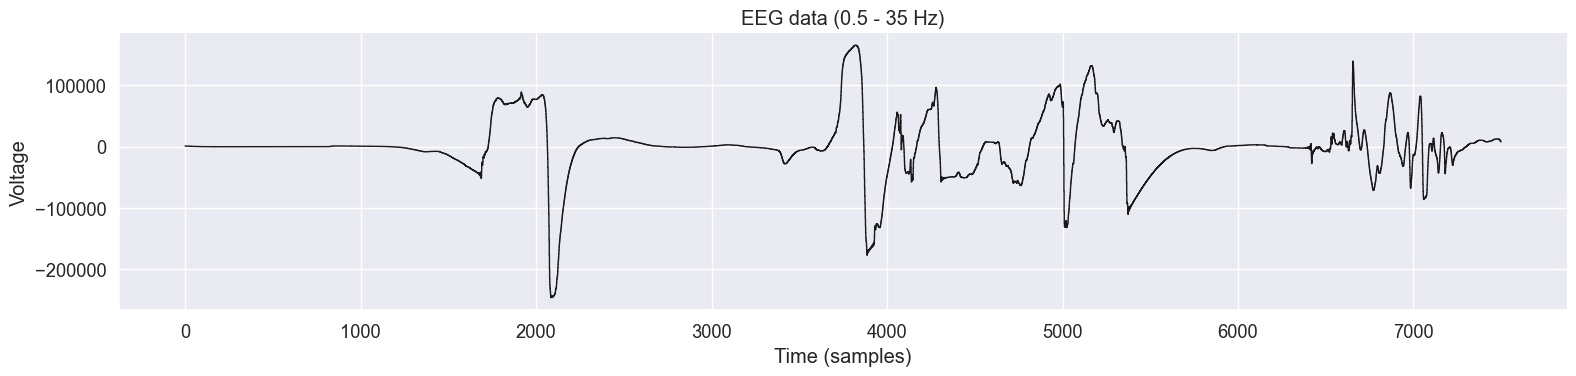

In [51]:
import notebooks.Util.DrawEpochs
reload(notebooks.Util.DrawEpochs)

epoch = notebooks.Util.DrawEpochs.get_epoch(mne_filtered, 1123)
notebooks.Util.DrawEpochs.plot_eeg_data(epoch)